<a href="https://colab.research.google.com/github/oralcoder/2023_ANU_AI/blob/main/deep_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 필요 모듈 가져오기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

<br/>

###2. 데이터 준비

In [ ]:
(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()
print(type(trainX))
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

11490434/11490434 [==============================] - 1s 0us/step
<class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
trainY[0]

5

In [ ]:
# Label 확인
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

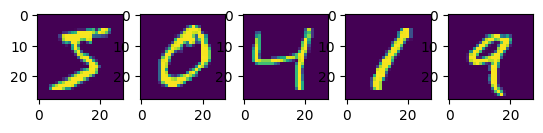

In [ ]:
plt.subplot(1,5,1)
plt.imshow(trainX[0])
plt.subplot(1,5,2)
plt.imshow(trainX[1])
plt.subplot(1,5,3)
plt.imshow(trainX[2])
plt.subplot(1,5,4)
plt.imshow(trainX[3])
plt.subplot(1,5,5)
plt.imshow(trainX[4])
plt.show()

In [ ]:
print(trainY[0:5])

[5 0 4 1 9]


In [ ]:
# 1차원의 펼쳐진 모양으로 변환 (28 X 28 형태를 784로 변환, 3차원을 2차원으로 변환)
trainX = trainX.reshape((60000, 28 * 28))
testX = testX.reshape((10000, 28 * 28))

# 정규화
trainX = trainX / 255
testX = testX / 255

<br/>

###3. 모델 I

####모델 구성

In [ ]:
model = keras.Sequential()
# 입력 노드, 차원일 경우 뒤에 콤마 추가
model.add(layers.InputLayer(input_shape=(28*28,)))
# 128개의 노드
model.add(layers.Dense(128, activation='relu'))
# 10개의 확률로 반환 반환된 값의 전체 합은 1
# 10개 중 하나에 속할 확률
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


model = keras.Sequential()
# 입력 노드
#model.add(layers.InputLayer(input_shape=(28*28,)))
# 128개의 노드
model.add(layers.Dense(512, input_shape=(28*28, ), activation='relu'))
model.add(layers.Dropout(0.5))
# 10개의 확률로 반환 반환된 값의 전체 합은 1
# 10개 중 하나에 속할 확률
model.add(layers.Dense(10, activation='softmax'))
model.summary()

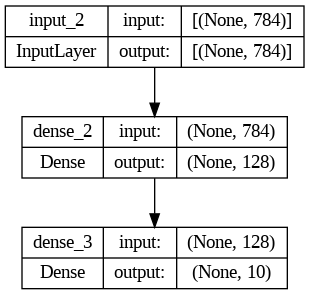

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
#from tensorflow.keras.optimizers import Adam
#model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


<br/>

####학습

In [ ]:
hist1 = model.fit(trainX, trainY, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2599 - accuracy: 0.9255
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1173 - accuracy: 0.9656
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0801 - accuracy: 0.9761
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0615 - accuracy: 0.9813
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0374 - accuracy: 0.9885
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0305 - accuracy: 0.9902
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

<br/>

####모델 평가

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9796


[0.09553582221269608, 0.9796000123023987]

In [ ]:
print(hist1.history['loss'])
print(hist1.history['accuracy'])

[0.259903222322464, 0.1173306554555893, 0.08007799834012985, 0.06149858236312866, 0.04693126305937767, 0.03742896765470505, 0.030472148209810257, 0.02444043941795826, 0.01961015909910202, 0.017232855781912804, 0.013403216376900673, 0.011784650385379791, 0.01077710185199976, 0.01042201742529869, 0.008081283420324326]
[0.9254999756813049, 0.9655666947364807, 0.9760500192642212, 0.9812666773796082, 0.9854166507720947, 0.9884833097457886, 0.9901999831199646, 0.9922666549682617, 0.9939000010490417, 0.994533360004425, 0.9958833456039429, 0.9962999820709229, 0.9965333342552185, 0.996649980545044, 0.9973499774932861]


In [ ]:
preds = model.predict(testX)
print(preds[0])
print(np.argmax(preds[0]))

313/313 [==============================] - 1s 2ms/step
[3.3474928e-11 2.3331562e-13 1.0919142e-11 2.0440501e-07 1.3339610e-18
 3.5185943e-12 6.6129464e-24 9.9999958e-01 1.3612485e-12 1.4466701e-07]
7


In [ ]:
type(preds[0])

numpy.ndarray

In [ ]:
errors = []
for i, pred in enumerate(preds):
  if np.argmax(pred) != testY[i]:
    errors.append(i)

In [ ]:
print(errors)
print(len(errors))

[149, 247, 321, 340, 381, 445, 495, 582, 583, 613, 619, 629, 685, 691, 720, 726, 740, 877, 882, 900, 947, 951, 956, 965, 1014, 1039, 1044, 1112, 1156, 1178, 1226, 1242, 1247, 1260, 1289, 1319, 1328, 1364, 1378, 1393, 1414, 1422, 1444, 1494, 1500, 1522, 1530, 1549, 1609, 1681, 1717, 1748, 1754, 1800, 1850, 1878, 1901, 1941, 1987, 2004, 2044, 2098, 2109, 2118, 2130, 2135, 2272, 2293, 2387, 2408, 2422, 2488, 2607, 2648, 2654, 2810, 2896, 2921, 2927, 2939, 3060, 3073, 3117, 3225, 3289, 3333, 3422, 3475, 3503, 3520, 3558, 3567, 3634, 3681, 3727, 3751, 3762, 3796, 3808, 3818, 3838, 3853, 3906, 3941, 3943, 3946, 4027, 4065, 4075, 4078, 4156, 4163, 4199, 4224, 4248, 4271, 4289, 4355, 4360, 4425, 4437, 4443, 4497, 4504, 4536, 4547, 4571, 4601, 4635, 4639, 4671, 4740, 4761, 4807, 4823, 4880, 4956, 5078, 5199, 5265, 5331, 5457, 5642, 5734, 5936, 5937, 5955, 5972, 5973, 5981, 5997, 6009, 6011, 6023, 6045, 6059, 6555, 6558, 6571, 6574, 6576, 6597, 6625, 6651, 6755, 6783, 6847, 6945, 7233, 7434, 780

7 7


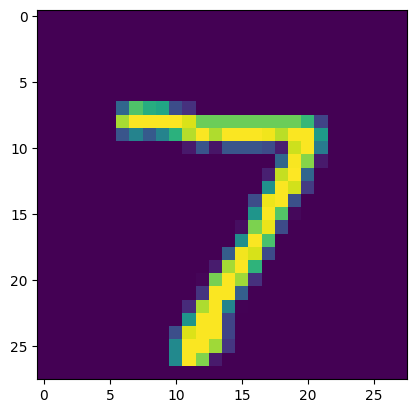

In [ ]:
print(np.argmax(preds[0]), testY[0])
plt.imshow(testX[0].reshape(28, 28))
plt.show()

7


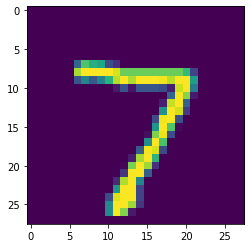

In [ ]:
print(testY[0])
plt.imshow(testX[0].reshape(28, 28))
plt.show()

In [ ]:
print(preds[321])
print(np.argmax(preds[321]))

[6.3911330e-08 6.6290283e-08 1.2774857e-03 1.9906669e-04 1.6451792e-17
 1.6740926e-09 4.8153314e-17 9.9787170e-01 5.7019806e-04 8.1383580e-05]
7


2


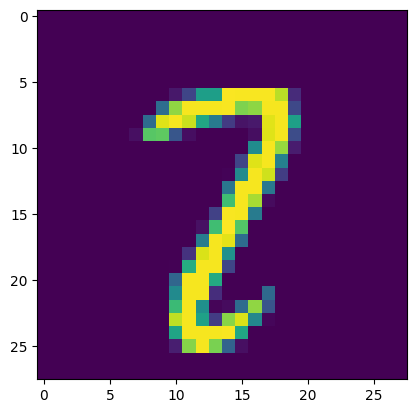

In [ ]:
print(testY[321])
plt.imshow(testX[321].reshape(28, 28))
plt.show()

<br/>

###4. 모델 II

####모델 구성

In [ ]:
model = keras.Sequential()
# 입력 노드
model.add(layers.InputLayer(input_shape=(28*28,)))
# 256개의 노드
model.add(layers.Dense(256, activation='relu'))
# 128개의 노드
model.add(layers.Dense(128, activation='relu'))
# 10개의 확률로 반환 반환된 값의 전체 합은 1
# 10개 중 하나에 속할 확률
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


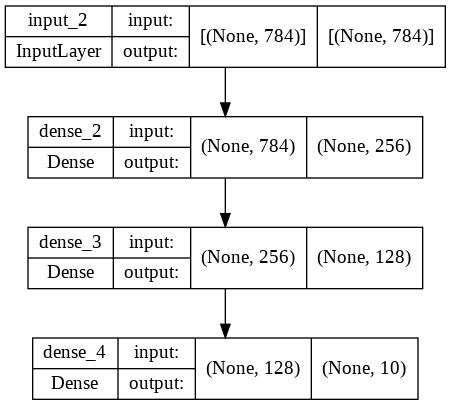

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

<br/>

####학습

In [ ]:
hist2 = model.fit(trainX, trainY, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2026 - accuracy: 0.9392
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0859 - accuracy: 0.9737
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0586 - accuracy: 0.9816
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0433 - accuracy: 0.9860
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0238 - accuracy: 0.9921
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.015

<br/>

####모델 평가

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.9801


[0.10666147619485855, 0.9800999760627747]

In [ ]:
print(hist2.history['loss'])
print(hist2.history['accuracy'])

[0.20107698440551758, 0.08591024577617645, 0.0602596290409565, 0.045005448162555695, 0.033713482320308685]
[0.941016674041748, 0.9731500148773193, 0.9808833599090576, 0.9857500195503235, 0.989133358001709]


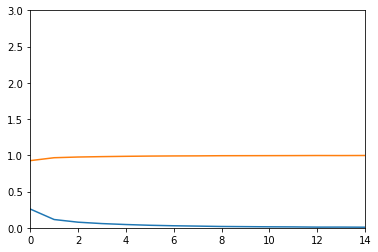

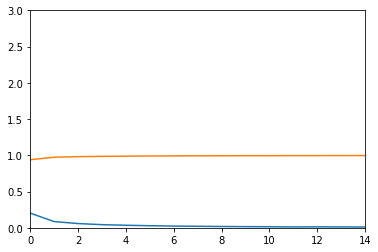

In [ ]:
plt.figure()
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['accuracy'])
plt.xlim([0,14])
plt.ylim([0,3])
plt.figure()
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['accuracy'])
plt.xlim([0,14])
plt.ylim([0,3])
plt.show()